###  Import a 311 NYC service request.


In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [3]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
# Looking for features (columns) 

data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


Now, we need to understand each feature one by one. If the feature contains all Nun or all same entries or maybe, all different entries, then we will omit such columns, since these columns do not contain information that is statistically meaningful or can give us any trend.

For instance, the 'Unique Key' column has a different number for each entry whereas columns like 'Agency Name', 'Complaint Type' have a different group of lists from which we can predict which kind of complaint occurs more often (e.g frequency distribution). So we can improve our future prediction and even can take some precautions (if permissible).

In [7]:
# Dropping columns and saving it in another data frame

data_mod = data.drop(columns=['Unique Key'],axis=1)  # axis =1 means when we are dealing with the colums(working horizontally)
                                                     # axis =0 means when we are dealing with the rows (working vertically)
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

In [8]:
# To evaluate distinguishable outcomes belong to this feature

pd.unique(data['Agency'])

array(['NYPD'], dtype=object)

In [9]:
# Frequency of the different outcomes

data['Agency'].value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [10]:
data_mod = data_mod.drop(columns=['Agency'],axis=1)


In [11]:
pd.unique(data['Agency Name'])

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [12]:
data['Agency Name'].value_counts()

New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: Agency Name, dtype: int64

In [13]:
data['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [14]:
data["Complaint Type"].value_counts().head()

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Name: Complaint Type, dtype: int64

In [15]:
data.Descriptor.value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


In [16]:
data.Descriptor.value_counts().head(5)

No Access                        75888
Loud Music/Party                 69708
Posted Parking Sign Violation    27200
Partial Access                   24993
Loud Talking                     23810
Name: Descriptor, dtype: int64

In [17]:
data['Location Type'].value_counts().head()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
Name: Location Type, dtype: int64

In [18]:
data['Incident Zip'].value_counts().head(4)

11385.0    6396
11368.0    5384
11234.0    5199
11211.0    4854
Name: Incident Zip, dtype: int64

In [19]:
data['Incident Address'].value_counts().head(4)

1207 BEACH AVENUE          1014
2117 3 AVENUE               660
78-15 PARSONS BOULEVARD     637
89 MOORE STREET             512
Name: Incident Address, dtype: int64

In [20]:
data['Street Name'].value_counts().head(5)

BROADWAY          4122
3 AVENUE          1804
SHERMAN AVENUE    1390
BEACH AVENUE      1262
BEDFORD AVENUE    1226
Name: Street Name, dtype: int64

In [21]:
data['Cross Street 1'].value_counts().head(4)

BEND        5123
BROADWAY    5055
3 AVENUE    4013
5 AVENUE    3564
Name: Cross Street 1, dtype: int64

In [22]:
data['Cross Street 2'].value_counts().head(4)

BEND        5376
BROADWAY    4240
8 AVENUE    3360
DEAD END    2737
Name: Cross Street 2, dtype: int64

In [23]:
data['Intersection Street 1'].value_counts().head(4)

BROADWAY      757
170 STREET    506
6 AVENUE      379
44 STREET     362
Name: Intersection Street 1, dtype: int64

In [24]:
data['Intersection Street 2'].value_counts().head(4)

BROADWAY    1525
2 AVENUE     823
6 AVENUE     783
5 AVENUE     619
Name: Intersection Street 2, dtype: int64

In [25]:
data['Address Type'].value_counts().head(4)

ADDRESS         292699
INTERSECTION     50514
BLOCKFACE        13786
LATLONG           3931
Name: Address Type, dtype: int64

In [26]:
data['City'].value_counts().head(4)

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
Name: City, dtype: int64

In [27]:
data.Landmark.value_counts().head(5)

CENTRAL PARK              71
PROSPECT PARK             22
WASHINGTON SQUARE PARK    16
UNION SQUARE PARK         14
SUNSET PARK               13
Name: Landmark, dtype: int64

In [28]:
data['Facility Type'].value_counts()

Precinct    362169
Name: Facility Type, dtype: int64

In [29]:
data.Status.value_counts()

Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

In [30]:
data['Due Date'].value_counts()

06/04/2015 06:16:23 AM    3
08/09/2015 06:16:46 AM    3
03/02/2015 06:27:37 AM    3
08/16/2015 06:49:03 AM    3
12/24/2015 02:33:50 AM    3
                         ..
09/07/2015 10:16:39 PM    1
09/07/2015 10:18:47 PM    1
09/07/2015 10:19:56 PM    1
09/07/2015 10:21:20 PM    1
01/01/2015 08:00:50 AM    1
Name: Due Date, Length: 362015, dtype: int64

In [31]:
data['Due Date'].value_counts().head()

06/04/2015 06:16:23 AM    3
08/09/2015 06:16:46 AM    3
03/02/2015 06:27:37 AM    3
08/16/2015 06:49:03 AM    3
12/24/2015 02:33:50 AM    3
Name: Due Date, dtype: int64

In [32]:
data['Resolution Description'].value_counts().head()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    107051
The Police Department responded to the complaint and took action to fix the condition.                                                      72917
The Police Department responded and upon arrival those responsible for the condition were gone.                                             71281
The Police Department responded to the complaint and determined that police action was not necessary.                                       47612
The Police Department issued a summons in response to the complaint.                                                                        37342
Name: Resolution Description, dtype: int64

In [33]:
data['School Name'].value_counts()

Unspecified                        364557
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64

In [34]:
data['School Number'].value_counts()

Unspecified    364557
Q001                1
Name: School Number, dtype: int64

In [35]:
data['School Region'].value_counts()

Unspecified    364557
Name: School Region, dtype: int64

In [36]:
data['School Not Found'].value_counts()

N    364558
Name: School Not Found, dtype: int64

In [37]:
data['School Code'].value_counts()

Unspecified    364557
Name: School Code, dtype: int64

In [38]:
data['School Phone Number'].value_counts()

Unspecified    364557
7182176034          1
Name: School Phone Number, dtype: int64

In [39]:
data['School Address'].value_counts()

Unspecified                                     364557
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64

In [40]:
data['School City'].value_counts()

Unspecified    364557
QUEENS              1
Name: School City, dtype: int64

In [41]:
data['School State'].value_counts()

Unspecified    364557
NY                  1
Name: School State, dtype: int64

In [42]:
data['School Zip'].value_counts()

Unspecified    364557
Name: School Zip, dtype: int64

In [43]:
data['School Not Found'].value_counts()

N    364558
Name: School Not Found, dtype: int64

In [44]:
data['School or Citywide Complaint'].value_counts()

Series([], Name: School or Citywide Complaint, dtype: int64)

In [45]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [46]:
data_mod = data_mod.drop(columns=['School Name', 'School Number', 'School Region', 'School Code',
                              'School Phone Number', 'School Address', 'School City', 'School State',
                                 'School Zip', 'School Not Found', 'School or Citywide Complaint'],axis=1)

In [47]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [48]:
data['Vehicle Type'].value_counts()

Series([], Name: Vehicle Type, dtype: int64)

In [49]:
data['Taxi Company Borough'].value_counts()

Series([], Name: Taxi Company Borough, dtype: int64)

In [50]:
data['Taxi Pick Up Location'].value_counts()

Series([], Name: Taxi Pick Up Location, dtype: int64)

In [51]:
data_mod = data_mod.drop(columns=['Vehicle Type','Taxi Company Borough','Taxi Pick Up Location'],axis=1)

In [52]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [53]:
data['Bridge Highway Name'].value_counts().head(5)

FDR Dr                 36
BQE/Gowanus Expwy      35
Belt Pkwy              34
Cross Bronx Expwy      27
Staten Island Expwy    22
Name: Bridge Highway Name, dtype: int64

In [54]:
data['Bridge Highway Direction'].value_counts().head(4)

East/Queens Bound             26
North/Bronx Bound             25
North/Westbound (To GW Br)    23
West/Staten Island Bound      23
Name: Bridge Highway Direction, dtype: int64

In [55]:
data['Road Ramp'].value_counts()

Roadway    199
Ramp        63
Name: Road Ramp, dtype: int64

In [56]:
data['Bridge Highway Segment'].value_counts()

East 96th St (Exit 14) - Triborough Br (Exit 17)                              6
Bronx River Pkwy (Exit 4B) - Westchester Ave / White Plains Road (Exit 5A)    5
Westchester Ave / White Plains Road (Exit 5A) - Castle Hill Ave (Exit 5B)     4
East 177th St/Sheridan Expwy (I-895) (Exit 5)                                 4
Brooklyn-Queens Expwy(I-278) (Exit 25) - Brooklyn-Battery Tunnel (I-478)      3
                                                                             ..
Sheridan Expwy (I-895) (Exit 4A) - Bronx River Pkwy (Exit 4B)                 1
Westchester Ave (Exit 8A) - East Tremont Ave (Exit 7B)                        1
BEGIN Cross Bronx Expwy (Extension) - Randall Ave (Exit 11)                   1
8Ave/7Ave (Exit 3) - 4th Ave (Exit 2B)                                        1
La Guardia Airport-Main Terminal (Exit 7)                                     1
Name: Bridge Highway Segment, Length: 187, dtype: int64

In [57]:
data['Bridge Highway Segment'].value_counts().head(6)

East 96th St (Exit 14) - Triborough Br (Exit 17)                              6
Bronx River Pkwy (Exit 4B) - Westchester Ave / White Plains Road (Exit 5A)    5
Westchester Ave / White Plains Road (Exit 5A) - Castle Hill Ave (Exit 5B)     4
East 177th St/Sheridan Expwy (I-895) (Exit 5)                                 4
Brooklyn-Queens Expwy(I-278) (Exit 25) - Brooklyn-Battery Tunnel (I-478)      3
East 42nd St (Exit 9) - East 61st St / East 63rd St (Exit 12)                 3
Name: Bridge Highway Segment, dtype: int64

In [58]:
data['Garage Lot Name'].value_counts()

Series([], Name: Garage Lot Name, dtype: int64)

In [59]:
data['Ferry Direction'].value_counts()

Manhattan Bound    1
Name: Ferry Direction, dtype: int64

In [60]:
data['Ferry Terminal Name'].value_counts()

St. George Terminal (Staten Island)    1
Barberi                                1
Name: Ferry Terminal Name, dtype: int64

In [61]:
data_mod = data_mod.drop(columns=['Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)

In [62]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [63]:
data['Latitude'].value_counts().head()

40.830362    1012
40.797708     660
40.721959     637
40.703819     508
40.708726     399
Name: Latitude, dtype: int64

In [64]:
data['Longitude'].value_counts().head()

-73.866022    1012
-73.940182     660
-73.809697     637
-73.942073     512
-73.790654     399
Name: Longitude, dtype: int64

In [65]:
data['Location'].value_counts().head()

(40.83036235589997, -73.86602154214397)     1012
(40.79770758865914, -73.9401822682408)       660
(40.72195913199264, -73.80969682426189)      637
(40.703818970933284, -73.94207345177706)     508
(40.708726489323325, -73.7906539235748)      399
Name: Location, dtype: int64

In [66]:
data_mod.sample(10)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Y Coordinate (State Plane),Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
14705,12/15/2015 09:59:52 PM,12/16/2015 07:43:42 AM,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,80-57 88 AVENUE,88 AVENUE,80 STREET,...,190735.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.690117,-73.861147,"(40.69011651875657, -73.86114687918405)"
98027,09/27/2015 02:19:21 AM,09/27/2015 06:24:00 AM,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10012.0,107 MACDOUGAL STREET,MACDOUGAL STREET,BLEECKER STREET,...,205131.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.729714,-74.000743,"(40.7297138891165, -74.00074326038714)"
16524,12/14/2015 03:13:10 AM,12/14/2015 07:27:40 AM,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10034.0,NaN,NaN,NaN,...,253086.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.861310,-73.921232,"(40.86131044941899, -73.92123202230121)"
320233,03/05/2015 10:32:18 AM,03/05/2015 04:10:12 PM,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11230.0,865 EAST 19 STREET,EAST 19 STREET,AVENUE H,...,168729.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.629791,-73.958378,"(40.62979113339484, -73.95837849045108)"
217077,06/16/2015 01:44:23 AM,06/16/2015 03:51:02 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,125 WEST 112 STREET,WEST 112 STREET,ST NICHOLAS AVENUE,...,230750.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.800022,-73.952858,"(40.800021785765296, -73.95285785808254)"
125158,09/05/2015 12:56:32 AM,09/05/2015 03:00:45 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040.0,450 AUDUBON AVENUE,AUDUBON AVENUE,WEST 187 STREET,...,250000.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.852846,-73.929346,"(40.85284555442006, -73.92934629554779)"
182208,07/16/2015 02:14:06 AM,07/16/2015 05:34:07 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11236.0,947 EAST 79 STREET,EAST 79 STREET,FLATLANDS AVENUE,...,170290.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.634050,-73.912965,"(40.634050341481164, -73.91296502162781)"
206474,06/25/2015 01:00:12 AM,06/25/2015 04:04:17 AM,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10003.0,21 ASTOR PLACE,ASTOR PLACE,BROADWAY,...,205232.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.729991,-73.992221,"(40.729990849056996, -73.99222099001472)"
179988,07/17/2015 11:19:30 PM,07/18/2015 01:25:33 PM,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11377.0,47-10 LAUREL HILL BOULEVARD,LAUREL HILL BOULEVARD,47 STREET,...,207093.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.735071,-73.918971,"(40.73507059247194, -73.91897087656503)"
317961,03/08/2015 01:28:42 AM,03/08/2015 05:01:27 AM,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11210.0,1904 ALBANY AVENUE,ALBANY AVENUE,AVENUE J,...,167587.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.626647,-73.936423,"(40.62664653889243, -73.93642328148555)"


In [67]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [68]:
# Final info.(features) after cleaning
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    364558 non-null  object 
 1   Closed Date                     362177 non-null  object 
 2   Agency Name                     364558 non-null  object 
 3   Complaint Type                  364558 non-null  object 
 4   Descriptor                      358057 non-null  object 
 5   Location Type                   364425 non-null  object 
 6   Incident Zip                    361560 non-null  float64
 7   Incident Address                312859 non-null  object 
 8   Street Name                     312859 non-null  object 
 9   Cross Street 1                  307370 non-null  object 
 10  Cross Street 2                  306753 non-null  object 
 11  Intersection Street 1           51120 non-null   object 
 12  Intersection Str

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

Now, converting the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [69]:
data_mod['Closed Date'] = pd.to_datetime(data_mod['Closed Date'])
data_mod['Created Date'] = pd.to_datetime(data_mod['Created Date'])

data_mod['Request_Closing_Time'] = data_mod['Closed Date'] - data_mod['Created Date']

#data_mod = data_mod[(data_mod.Request_Closing_Time)>=0]

In [70]:
data_mod['Closed Date'].tail()

364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, dtype: datetime64[ns]

In [71]:
data_mod['Created Date'].tail()

364553   2015-01-01 00:04:44
364554   2015-01-01 00:04:28
364555   2015-01-01 00:01:30
364556   2015-01-01 00:01:29
364557   2015-01-01 00:00:50
Name: Created Date, dtype: datetime64[ns]

In [72]:
data_mod.Request_Closing_Time.tail()

364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [73]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    364558 non-null  datetime64[ns] 
 1   Closed Date                     362177 non-null  datetime64[ns] 
 2   Agency Name                     364558 non-null  object         
 3   Complaint Type                  364558 non-null  object         
 4   Descriptor                      358057 non-null  object         
 5   Location Type                   364425 non-null  object         
 6   Incident Zip                    361560 non-null  float64        
 7   Incident Address                312859 non-null  object         
 8   Street Name                     312859 non-null  object         
 9   Cross Street 1                  307370 non-null  object         
 10  Cross Street 2                  306753 non-n

In [74]:
data_mod.sample(4)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Request_Closing_Time
134841,2015-08-27 15:56:42,2015-08-27 16:56:12,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11103.0,46-03 BROADWAY,BROADWAY,46 STREET,...,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.756665,-73.914075,"(40.7566654862846, -73.91407536255473)",0 days 00:59:30
139803,2015-08-23 00:19:17,2015-08-23 03:08:43,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11225.0,559 FLATBUSH AVENUE,FLATBUSH AVENUE,MAPLE STREET,...,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.660179,-73.960609,"(40.66017943032953, -73.96060861302107)",0 days 02:49:26
347968,2015-01-26 12:25:13,2015-01-26 19:32:52,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11210.0,1084 EAST 29 STREET,EAST 29 STREET,AVENUE J,...,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.624871,-73.947542,"(40.62487078058429, -73.9475419584452)",0 days 07:07:39
306275,2015-03-22 00:21:47,2015-03-22 00:54:21,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10014.0,455 HUDSON STREET,HUDSON STREET,MORTON STREET,...,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.731281,-74.006697,"(40.73128095200977, -74.00669671709193)",0 days 00:32:34


In [75]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables) we compe up with  4 major conclusions  after generic data mining

Now, lets visualize some basic results that we can conclude from the data. For instance, which type of complaint is more dominant?
First, we will attempt the visualization of a single feature (complain type). Then, we will do the same for other features. 

In [76]:
data_complaint = data['Complaint Type'].value_counts()
data_complaint

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [77]:
data_complaint = data_complaint.to_frame()
data_complaint

,Complaint Type
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


In [78]:
# Measuring the frequency (occurence) of the different complaint


data_complaint = data_complaint.rename(columns={'Complaint Type':'Counts'})
data_complaint

,Counts
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


In [79]:
# Evaluate the above in percentage
data_complaint['Percentage'] = np.around((data_complaint.Counts/data_complaint.Counts.sum())*100,decimals=2)
data_complaint

,Counts,Percentage
Blocked Driveway,100881,27.67
Illegal Parking,92679,25.42
Noise - Street/Sidewalk,51692,14.18
Noise - Commercial,44109,12.10
Derelict Vehicle,21661,5.94
Noise - Vehicle,19352,5.31
Animal Abuse,10541,2.89
Traffic,5198,1.43
Homeless Encampment,4879,1.34
Vending,4192,1.15


In [80]:
# Keeping the major complaint types

data_complaint = data_complaint[data_complaint.Percentage>1.0]

data_complaint

,Counts,Percentage
Blocked Driveway,100881,27.67
Illegal Parking,92679,25.42
Noise - Street/Sidewalk,51692,14.18
Noise - Commercial,44109,12.10
Derelict Vehicle,21661,5.94
Noise - Vehicle,19352,5.31
Animal Abuse,10541,2.89
Traffic,5198,1.43
Homeless Encampment,4879,1.34
Vending,4192,1.15


In [81]:
data_complaint = data_complaint.reset_index()
data_complaint

,index,Counts,Percentage
0,Blocked Driveway,100881,27.67
1,Illegal Parking,92679,25.42
2,Noise - Street/Sidewalk,51692,14.18
3,Noise - Commercial,44109,12.10
4,Derelict Vehicle,21661,5.94
5,Noise - Vehicle,19352,5.31
6,Animal Abuse,10541,2.89
7,Traffic,5198,1.43
8,Homeless Encampment,4879,1.34
9,Vending,4192,1.15


In [82]:
data_complaint = data_complaint.rename(columns={'index':'Complaint Type'})
data_complaint

,Complaint Type,Counts,Percentage
0,Blocked Driveway,100881,27.67
1,Illegal Parking,92679,25.42
2,Noise - Street/Sidewalk,51692,14.18
3,Noise - Commercial,44109,12.10
4,Derelict Vehicle,21661,5.94
5,Noise - Vehicle,19352,5.31
6,Animal Abuse,10541,2.89
7,Traffic,5198,1.43
8,Homeless Encampment,4879,1.34
9,Vending,4192,1.15


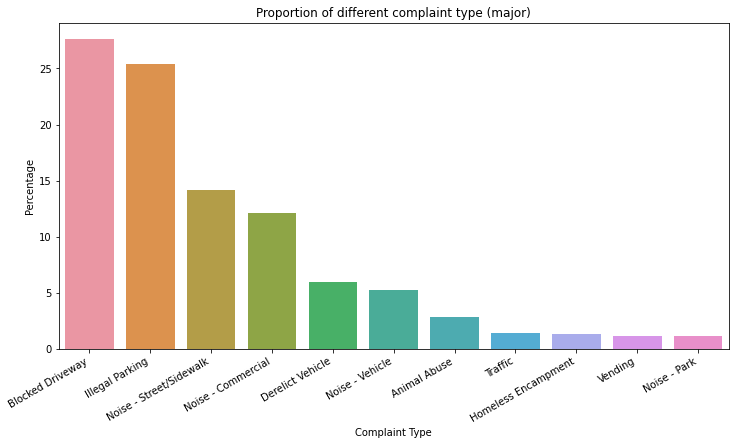

<Figure size 432x288 with 0 Axes>

In [83]:
# Visualization of the above evaluated dataset
plt.figure(figsize=(12,6))
com_type = sns.barplot(x=data_complaint['Complaint Type'],y=data_complaint.Percentage,data=data_complaint)
com_type.set_xticklabels(com_type.get_xticklabels(), rotation=30, ha="right")
plt.title('Proportion of different complaint type (major)')
plt.show()
plt.tight_layout()

From the above data (Counts and Percentage), it is clear that main complain comes from 'Blocked Driveway', 'Illegal Parking' and noise from Street/Sidewalk or Commercial. 

However, it is alluring to represent such results via visualization. And it is easy to realise the facts also. 

Now, we will do the same for several features.

In [84]:
# Applying the above procedure for Descriptor

data_descriptor = np.around(((data_mod['Descriptor'].value_counts()*100) / data_mod['Descriptor'].value_counts().sum()),
                            decimals=2)
data_descriptor = data_descriptor.to_frame()


data_descriptor

,Descriptor
No Access,21.19
Loud Music/Party,19.47
Posted Parking Sign Violation,7.60
Partial Access,6.98
Loud Talking,6.65
With License Plate,6.05
Blocked Hydrant,5.58
Commercial Overnight Parking,4.19
Blocked Sidewalk,3.87
Car/Truck Music,3.33


In [85]:
data_descriptor = data_descriptor.rename(columns={'Descriptor':'Percentage'})
data_descriptor['Descriptor'] = data_descriptor.index
data_descriptor

,Percentage,Descriptor
No Access,21.19,No Access
Loud Music/Party,19.47,Loud Music/Party
Posted Parking Sign Violation,7.60,Posted Parking Sign Violation
Partial Access,6.98,Partial Access
Loud Talking,6.65,Loud Talking
With License Plate,6.05,With License Plate
Blocked Hydrant,5.58,Blocked Hydrant
Commercial Overnight Parking,4.19,Commercial Overnight Parking
Blocked Sidewalk,3.87,Blocked Sidewalk
Car/Truck Music,3.33,Car/Truck Music


In [86]:
cols = data_descriptor.columns.tolist()
cols

['Percentage', 'Descriptor']

In [87]:
cols = cols[::-1]     # cols = cols[-1:]+cols[:-1] both code print same result
cols

['Descriptor', 'Percentage']

In [88]:


data_descriptor = data_descriptor[cols]
data_descriptor.head()

,Descriptor,Percentage
No Access,No Access,21.19
Loud Music/Party,Loud Music/Party,19.47
Posted Parking Sign Violation,Posted Parking Sign Violation,7.60
Partial Access,Partial Access,6.98
Loud Talking,Loud Talking,6.65


In [89]:
data_descriptor = data_descriptor[(data_descriptor.Percentage) >= 2.0]
data_descriptor

,Descriptor,Percentage
No Access,No Access,21.19
Loud Music/Party,Loud Music/Party,19.47
Posted Parking Sign Violation,Posted Parking Sign Violation,7.60
Partial Access,Partial Access,6.98
Loud Talking,Loud Talking,6.65
With License Plate,With License Plate,6.05
Blocked Hydrant,Blocked Hydrant,5.58
Commercial Overnight Parking,Commercial Overnight Parking,4.19
Blocked Sidewalk,Blocked Sidewalk,3.87
Car/Truck Music,Car/Truck Music,3.33


In [90]:
data_descriptor = data_descriptor.reset_index()
data_descriptor


,index,Descriptor,Percentage
0,No Access,No Access,21.19
1,Loud Music/Party,Loud Music/Party,19.47
2,Posted Parking Sign Violation,Posted Parking Sign Violation,7.60
3,Partial Access,Partial Access,6.98
4,Loud Talking,Loud Talking,6.65
5,With License Plate,With License Plate,6.05
6,Blocked Hydrant,Blocked Hydrant,5.58
7,Commercial Overnight Parking,Commercial Overnight Parking,4.19
8,Blocked Sidewalk,Blocked Sidewalk,3.87
9,Car/Truck Music,Car/Truck Music,3.33


In [91]:
data_descriptor = data_descriptor.drop(columns=['index'],axis=1)
data_descriptor

,Descriptor,Percentage
0,No Access,21.19
1,Loud Music/Party,19.47
2,Posted Parking Sign Violation,7.60
3,Partial Access,6.98
4,Loud Talking,6.65
5,With License Plate,6.05
6,Blocked Hydrant,5.58
7,Commercial Overnight Parking,4.19
8,Blocked Sidewalk,3.87
9,Car/Truck Music,3.33


In [92]:
# Applying the above procedure for Location Type

data_location_type = np.around(((data_mod['Location Type'].value_counts()*100) / data_mod['Location Type'].value_counts().sum()),
                            decimals=2)
data_location_type = data_location_type.to_frame()
data_location_type = data_location_type.rename(columns={'Location Type':'Percentage'})
data_location_type['Location Type'] = data_location_type.index
cols = data_location_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_location_type = data_location_type[cols]
data_location_type = data_location_type[(data_location_type.Percentage) >= 0.1]
data_location_type = data_location_type.reset_index()
data_location_type = data_location_type.drop(columns=['index'],axis=1)
data_location_type

,Location Type,Percentage
0,Street/Sidewalk,82.70
1,Store/Commercial,6.92
2,Club/Bar/Restaurant,5.91
3,Residential Building/House,2.43
4,Park/Playground,1.34
5,House of Worship,0.29
6,Residential Building,0.15


In [93]:
# Applying the above procedure for City

data_city = np.around(((data_mod['City'].value_counts()*100) / data_mod['City'].value_counts().sum()),
                            decimals=2)
data_city = data_city.to_frame()
data_city = data_city.rename(columns={'City':'Percentage'})
data_city['City'] = data_city.index
cols = data_city.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_city = data_city[cols]
data_city = data_city[(data_city.Percentage) >= 1.0]
data_city = data_city.reset_index()
data_city = data_city.drop(columns=['index'],axis=1)
data_city

,City,Percentage
0,BROOKLYN,32.87
1,NEW YORK,21.38
2,BRONX,13.60
3,STATEN ISLAND,4.24
4,JAMAICA,2.47
5,ASTORIA,2.21
6,FLUSHING,2.07
7,RIDGEWOOD,1.77
8,CORONA,1.49
9,WOODSIDE,1.21


In [94]:
# Applying the above procedure for Address Type

data_address_type = np.around(((data_mod['Address Type'].value_counts()*100) / data_mod['Address Type'].value_counts().sum()),
                            decimals=2)
data_address_type = data_address_type.to_frame()
data_address_type = data_address_type.rename(columns={'Address Type':'Percentage'})
data_address_type['Address Type'] = data_address_type.index
cols = data_address_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_address_type = data_address_type[cols]
#data_address_type = data_address_type[(data_address_type.Percentage) >= 1.0]
data_address_type = data_address_type.reset_index()
data_address_type = data_address_type.drop(columns=['index'],axis=1)
data_address_type

,Address Type,Percentage
0,ADDRESS,81.01
1,INTERSECTION,13.98
2,BLOCKFACE,3.82
3,LATLONG,1.09
4,PLACENAME,0.10


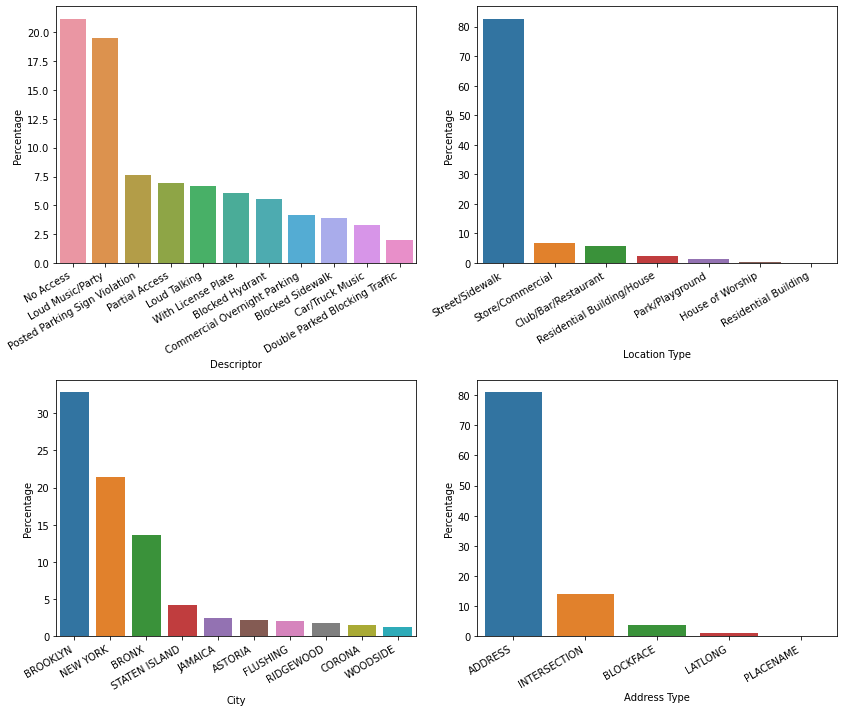

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#sns.set_theme(style="whitegrid")
#plt.suptitle("Proportion of different outcomes for few interesting features.")

descriptor = sns.barplot(ax=ax[0,0],x=data_descriptor.Descriptor,y=data_descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

location_type = sns.barplot(ax=ax[0,1],x=data_location_type['Location Type'],y=data_location_type.Percentage,)
location_type.set_xticklabels(location_type.get_xticklabels(), rotation=30, ha="right")

city = sns.barplot(ax=ax[1,0],x=data_city['City'],y=data_city.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address = sns.barplot(ax=ax[1,1],x=data_address_type['Address Type'],y=data_address_type.Percentage,)
address.set_xticklabels(address.get_xticklabels(), rotation=30, ha="right")


#plt.subplots_adjust(left=None, bottom=None, right=None, top=0.0, wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
Avarage_time = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Avarage time gap between logging the complaint and problem solved = ',Avarage_time, 'hour')
Central_val = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

So, one can take the central value as the normal time taken to solve the problem/issue. However, as it is clear from the deviation that it spreads around 6 hr.(more than the central value) from the distribution, so it is more practical to choose average time as the normal time to solve the problem. And categorize time interval as per the codes written below. 

In [ ]:
conditions = [data_place_CType_RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < data_place_CType_RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)

In [ ]:
data_place_CType_RCTime.head(6)

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts()

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts().plot(kind='bar')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()

Based on the above-discussed approximation, the proportion of the time interval (expressed in different groups/status) to solve the problem, is depicted here. And it is obvious that the 'Normal' status will dominant since the range is chosen around the average value.

Now, let's see, is there any pattern for lodging a complaint.

Does it depend on a particular day or is there any month where too much or fewer problems are recorded?

In [ ]:
data_mod['Created Date'].head(5)

In [97]:
# Creating a data frame Contain Days and Months of Complaint date

Year_Month_Day = pd.to_datetime(data_mod['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)

,Date,Month,Day,Month Name,Day No,Day Name
23865,2015-12-07,12,7,Dec,0,Monday
256448,2015-05-12,5,12,May,1,Tuesday
9936,2015-12-20,12,20,Dec,6,Sunday
164263,2015-08-01,8,1,Aug,5,Saturday
332068,2015-02-17,2,17,Feb,1,Tuesday
112225,2015-09-16,9,16,Sep,2,Wednesday
126947,2015-09-03,9,3,Sep,3,Thursday
96162,2015-09-28,9,28,Sep,0,Monday
249041,2015-05-19,5,19,May,1,Tuesday
73875,2015-10-20,10,20,Oct,1,Tuesday


In [98]:
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
Month_plot

,Counts
May,36437
Sep,35427
Jun,35315
Aug,34956
Jul,34888
Oct,32605
Nov,30773
Dec,30521
Apr,27305
Mar,25462


In [99]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

,Counts
Saturday,57580
Sunday,57434
Friday,53690
Thursday,50662
Monday,48913
Wednesday,48325
Tuesday,47954


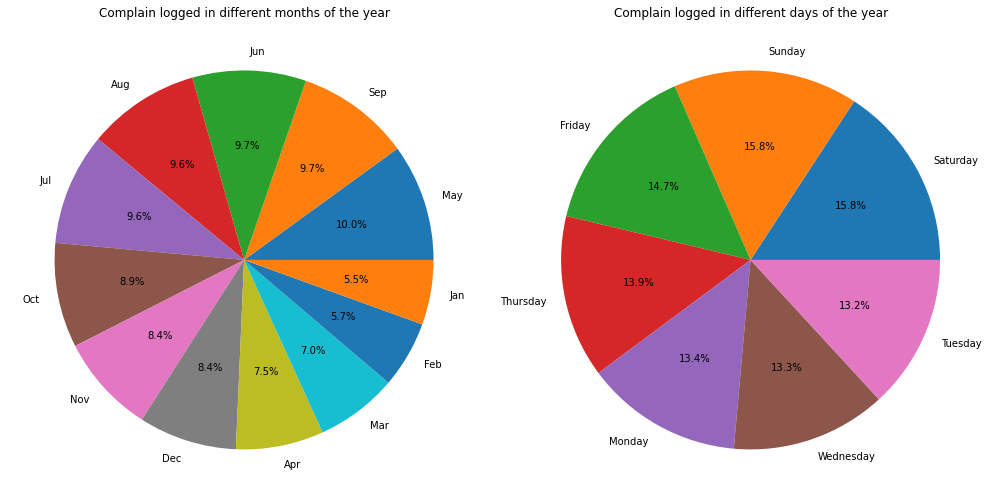

In [109]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['Counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()